In [84]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *

N = 50

# Bases
CH = SpectralBase(N,"CH")
CD = SpectralBase(N,"CD")
DC = DirichletC(N)

# Space
x = CH.x
f = np.sin(np.pi*x)
df = -np.pi**2*np.sin(np.pi*x)

# Boundary conditions
#bc = np.zeros(2)
#bc[0] = -1

# Transform
fhatch = CH.forward_fft(f)
fhatcd = CD.forward_fft(f)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


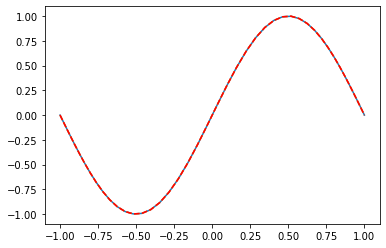

In [85]:
plt.plot(x,f)
plt.plot(x,CH.backward_fft(fhatch),"--")
plt.plot(x,CD.backward_fft(fhatcd),"r--")
plt.show()

## Derivative via recurrence

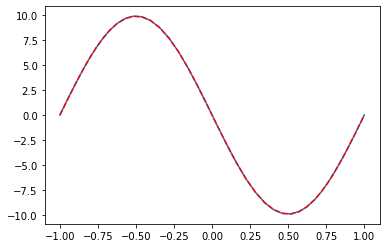

In [86]:
plt.plot(x,df)
plt.plot(x,CH.backward_fft(CH.derivative(fhatch,2)),"r--")
plt.show()

## Derivative via matmul

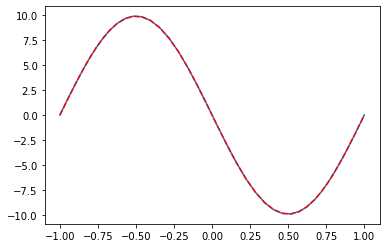

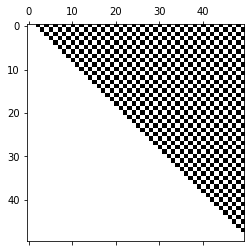

In [87]:
plt.plot(x,df)
fhat = CH.forward_fft(f)
dfhat = CH.dms(2)@fhat
plt.plot(x,CH.backward_fft(dfhat),"r--")
plt.show()
plt.spy(CH.dms(2))
plt.show()

## Galerkin

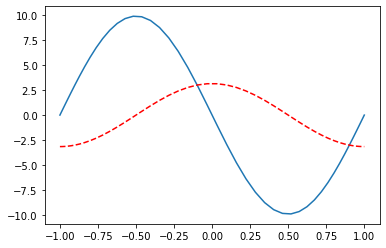

In [88]:
plt.plot(x,df)
dfhatcd = CD.derivative(fhatcd,1,out_cheby=True)

plt.plot(x,CD.family.backward_fft(dfhatcd),"r--")
plt.show()

## Derivative of field

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


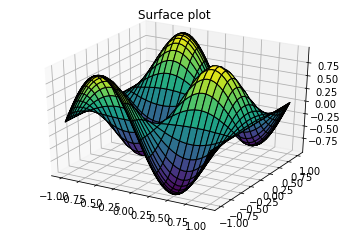

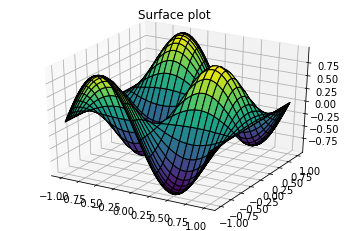

In [216]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pypde.bases import *
from pypde.field import *
from pypde.plot.wireframe import plot 

#def plot(xx,yy,f):
#    fig = plt.figure()
#    ax = plt.axes(projection='3d')#

#    ax.plot_surface(xx, yy, f,cmap='viridis', edgecolor='k')
#    ax.set_title('Surface plot')
#    plt.show()
    
N,M = 60,60
shape = (N,M)
S = Field(shape,("CD","CN"))
CH = Field(shape,("CH","CH"))

# Space
x,y = S.x, S.y
xx,yy = np.meshgrid(x,y,indexing="ij")
f = np.sin(np.pi* xx)*np.cos(np.pi*yy)

# Boundary conditions
bc = np.zeros((2,M))
bc[0,:] = -1 +np.sin(4*y)
bc[1,:] = 1+np.sin(4*y)

#Sbc = SpectralSpaceBC(bc.shape,("CD","CD"),axis=0,value=bc)
S.v = f

S.forward()
S.backward()
fhat = S.vhat

plot(xx,yy,f)
plot(xx,yy,S.total)


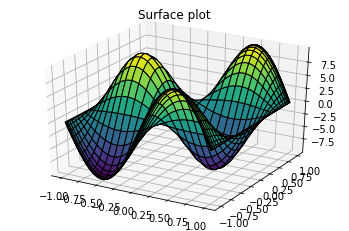

In [215]:
dfhat = S.derivative(fhat,2,axis=0)
print()
#dfhat[np.abs(dfhat<1e-5)] = 0
#print(dfhat)
dfhat = S.derivative(dfhat,0,axis=1)
CH.vhat = dfhat
CH.backward()

plot(xx,yy,CH.v)

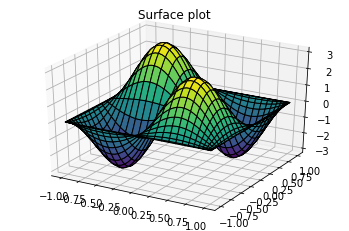

3.1341980207531046

In [210]:
#fhat[np.abs(fhat<1e-5)] = 0
#print(dfhat)
dfhat = S.derivative(fhat,1,axis=1)
dfhat = S.derivative(dfhat,0,axis=0)
dfy = CH.backward(dfhat)
plot(xx,yy,dfy)
dfy.max()